In [1]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "C:\\Windows\\Fonts\\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

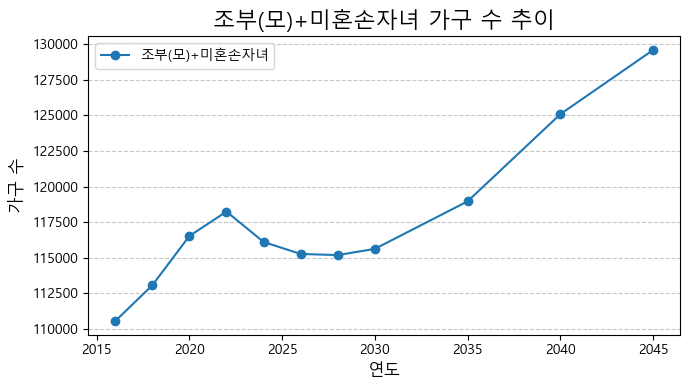

In [3]:
# 데이터 입력
data = {
    '연도': [2016, 2018, 2020, 2022, 2024, 2026, 2028, 2030, 2035, 2040, 2045],
    '가구 수': [110543, 113063, 116528, 118245, 116109, 115266, 115188, 115625, 118966, 125093, 129601]
}

df = pd.DataFrame(data)

# 선 그래프 생성
plt.figure(figsize=(7, 4))
plt.plot(df['연도'], df['가구 수'], marker='o', label='조부(모)+미혼손자녀')

# 그래프 설정
plt.title('조부(모)+미혼손자녀 가구 수 추이', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('가구 수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()


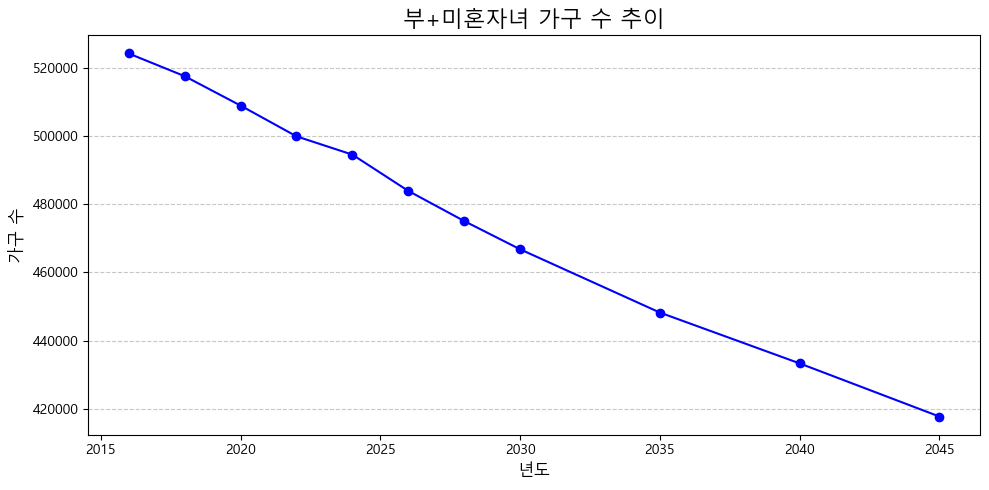

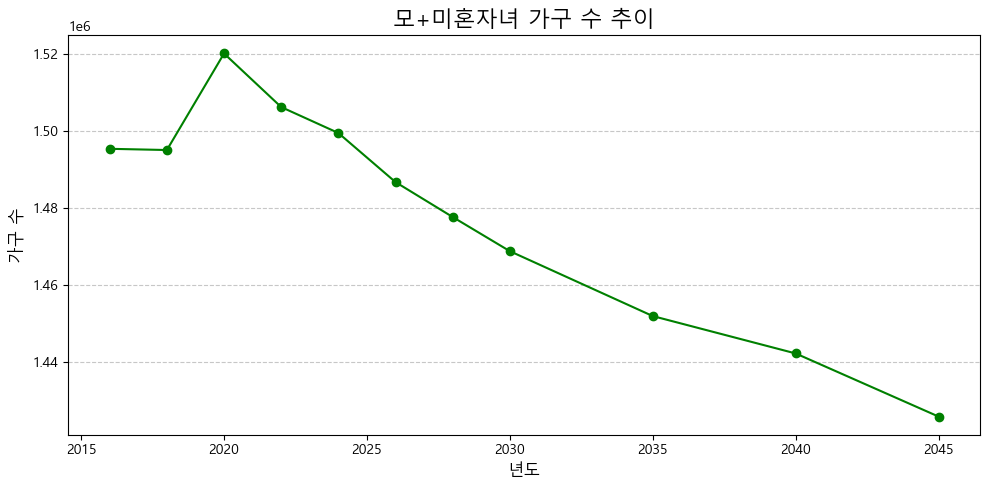

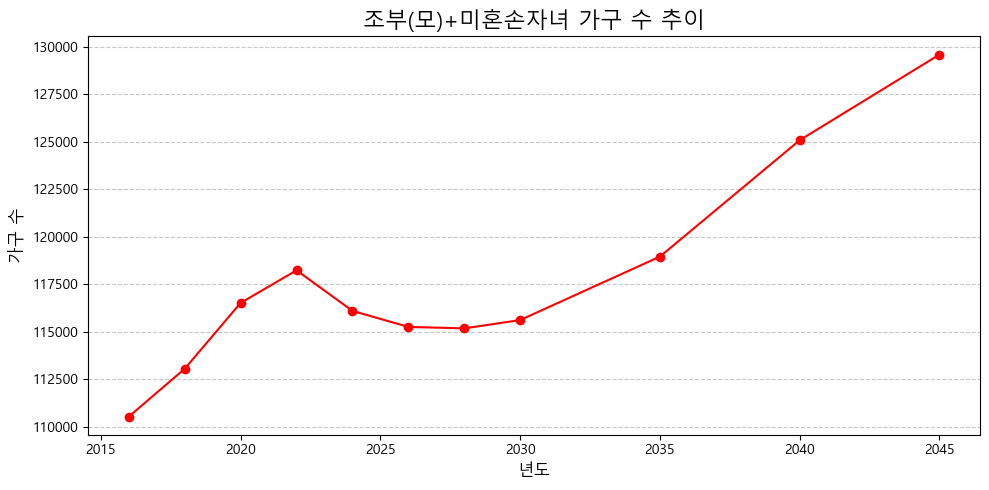

In [4]:
# 데이터 입력
data = {
    '년도': [2016, 2018, 2020, 2022, 2024, 2026, 2028, 2030, 2035, 2040, 2045],
    '부+미혼자녀': [524160, 517518, 508903, 499886, 494523, 483895, 475061, 466780, 448236, 433337, 417756],
    '모+미혼자녀': [1495419, 1495102, 1520193, 1506268, 1499524, 1486764, 1477690, 1468810, 1451945, 1442231, 1425824],
    '조부(모)+미혼손자녀': [110543, 113063, 116528, 118245, 116109, 115266, 115188, 115625, 118966, 125093, 129601]
}

df = pd.DataFrame(data)

# 그래프 1: 부+미혼자녀
plt.figure(figsize=(10, 5))
plt.plot(df['년도'], df['부+미혼자녀'], marker='o', label='부+미혼자녀', color='blue')
plt.title('부+미혼자녀 가구 수 추이', fontsize=16)
plt.xlabel('년도', fontsize=12)
plt.ylabel('가구 수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 그래프 2: 모+미혼자녀
plt.figure(figsize=(10, 5))
plt.plot(df['년도'], df['모+미혼자녀'], marker='o', label='모+미혼자녀', color='green')
plt.title('모+미혼자녀 가구 수 추이', fontsize=16)
plt.xlabel('년도', fontsize=12)
plt.ylabel('가구 수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 그래프 3: 조부(모)+미혼손자녀
plt.figure(figsize=(10, 5))
plt.plot(df['년도'], df['조부(모)+미혼손자녀'], marker='o', label='조부(모)+미혼손자녀', color='red')
plt.title('조부(모)+미혼손자녀 가구 수 추이', fontsize=16)
plt.xlabel('년도', fontsize=12)
plt.ylabel('가구 수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


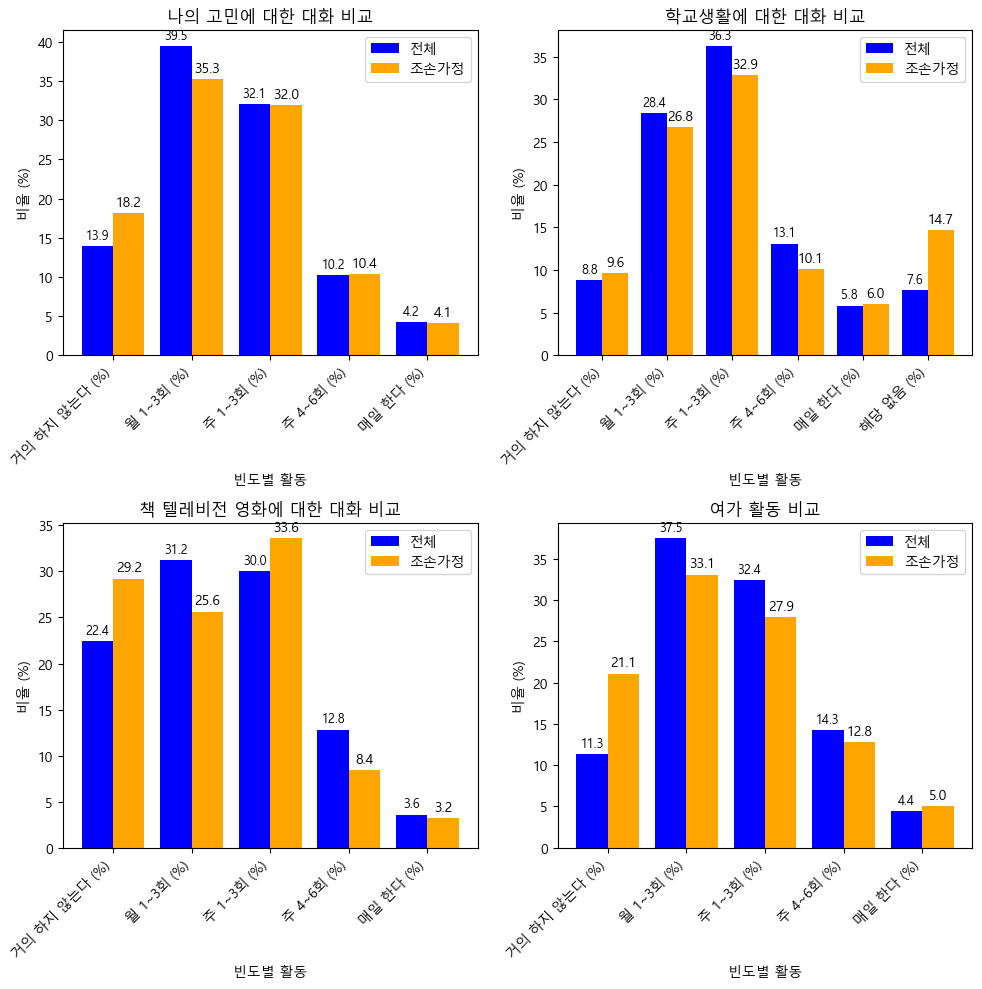

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 로드
file_path = './부모님_또는_양육자_과의_활동.csv'
data = pd.read_csv(file_path, encoding='cp949')

# "전체"와 "조손가정" 데이터 추출
overall_data = data[data['특성별(2)'].str.contains('소계', na=False)]
joson_data = data[data['특성별(2)'].str.contains('한부모 및 조손가족 등', na=False)]

# 특성 그룹 생성 (4개로 분류)
categories_groups = {
    "나의 고민에 대한 대화": ["거의 하지 않는다 (%)", "월 1~3회 (%)", "주 1~3회 (%)", "주 4~6회 (%)", "매일 한다 (%)"],
    "학교생활에 대한 대화": ["거의 하지 않는다 (%)", "월 1~3회 (%)", "주 1~3회 (%)", "주 4~6회 (%)", "매일 한다 (%)", "해당 없음 (%)"],
    "책 텔레비전 영화에 대한 대화": ["거의 하지 않는다 (%)", "월 1~3회 (%)", "주 1~3회 (%)", "주 4~6회 (%)", "매일 한다 (%)"],
    "여가 활동": ["거의 하지 않는다 (%)", "월 1~3회 (%)", "주 1~3회 (%)", "주 4~6회 (%)", "매일 한다 (%)"],
}

# 2x2 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()  # 2D -> 1D로 변환
bar_width = 0.4  # 막대 너비

# 각 특성별로 그래프 생성
for idx, (group, x_labels_fixed) in enumerate(categories_groups.items()):
    ax = axes[idx]
    
    # 해당 그룹에 포함된 열만 추출
    group_columns = [col for col in data.columns if group in col]
    
    # 수치 데이터만 추출
    overall_numeric = overall_data[group_columns].apply(pd.to_numeric, errors='coerce').mean()
    joson_numeric = joson_data[group_columns].apply(pd.to_numeric, errors='coerce').mean()
    
    # 그래프 그리기
    x = range(len(x_labels_fixed))
    overall_bars = ax.bar([i - bar_width / 2 for i in x], overall_numeric, bar_width, label='전체', color='blue')
    joson_bars = ax.bar([i + bar_width / 2 for i in x], joson_numeric, bar_width, label='조손가정', color='orange')
    
    # 수치값 표시
    for bar in overall_bars:
        height = bar.get_height()
        if not pd.isna(height):
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}', ha='center', va='bottom', fontsize=9)
    
    for bar in joson_bars:
        height = bar.get_height()
        if not pd.isna(height):
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}', ha='center', va='bottom', fontsize=10)
    
    # X축 설정
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels_fixed, rotation=45, ha='right', fontsize=10)
    ax.set_xlabel('빈도별 활동')
    ax.set_ylabel('비율 (%)')
    ax.set_title(f'{group} 비교')
    ax.legend()

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()


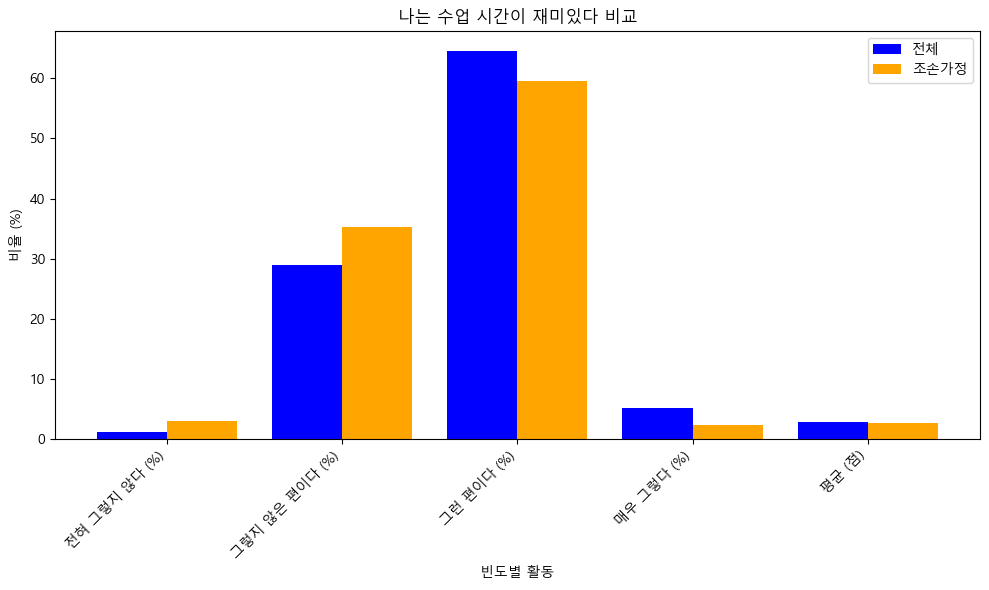

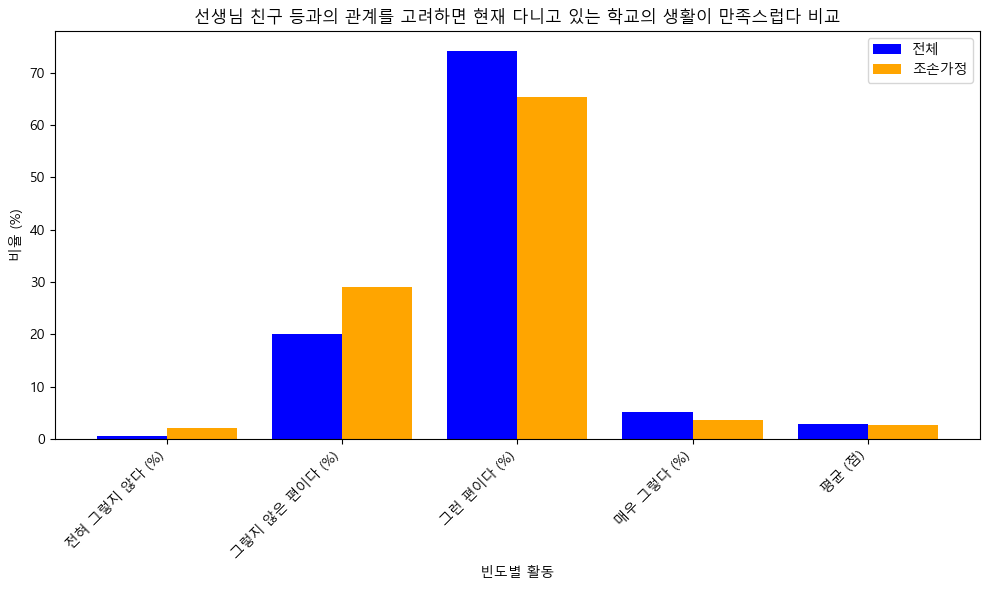

In [6]:
# 데이터 로드
file_path = './학교생활_만족도.csv'
data = pd.read_csv(file_path, encoding='cp949')

# "전체"와 "조손가정" 데이터 추출
overall_data = data[data['특성별(2)'].str.contains('소계', na=False)]
joson_data = data[data['특성별(2)'].str.contains('한부모 및 조손가족 등', na=False)]

# 특성 그룹 생성 (6개로 분류)
categories_groups = {
    "나는 수업 시간이 재미있다": [
        "전혀 그렇지 않다 (%)",
        "그렇지 않은 편이다 (%)",
        "그런 편이다 (%)",
        "매우 그렇다 (%)",
        "평균 (점)"
    ],
    "선생님 친구 등과의 관계를 고려하면 현재 다니고 있는 학교의 생활이 만족스럽다": [
        "전혀 그렇지 않다 (%)",
        "그렇지 않은 편이다 (%)",
        "그런 편이다 (%)",
        "매우 그렇다 (%)",
        "평균 (점)"
    ]
}

# 각 특성별로 그래프 생성
for group, x_labels_fixed in categories_groups.items():
    # 해당 그룹에 포함된 열만 추출
    group_columns = [col for col in data.columns if group in col]
    
    # 수치 데이터만 추출
    overall_numeric = overall_data[group_columns].apply(pd.to_numeric, errors='coerce').mean()
    joson_numeric = joson_data[group_columns].apply(pd.to_numeric, errors='coerce').mean()
    
    # 그래프 그리기
    x = range(len(x_labels_fixed))
    plt.figure(figsize=(10, 6))
    bar_width = 0.4  # 막대 너비
    plt.bar([i - bar_width / 2 for i in x], overall_numeric, bar_width, label='전체', color='blue')
    plt.bar([i + bar_width / 2 for i in x], joson_numeric, bar_width, label='조손가정', color='orange')
    
    plt.xticks(x, x_labels_fixed, rotation=45, ha='right', fontsize=10)
    plt.xlabel('빈도별 활동')
    plt.ylabel('비율 (%)')
    plt.title(f'{group} 비교')
    plt.legend()
    plt.tight_layout()
    plt.show()


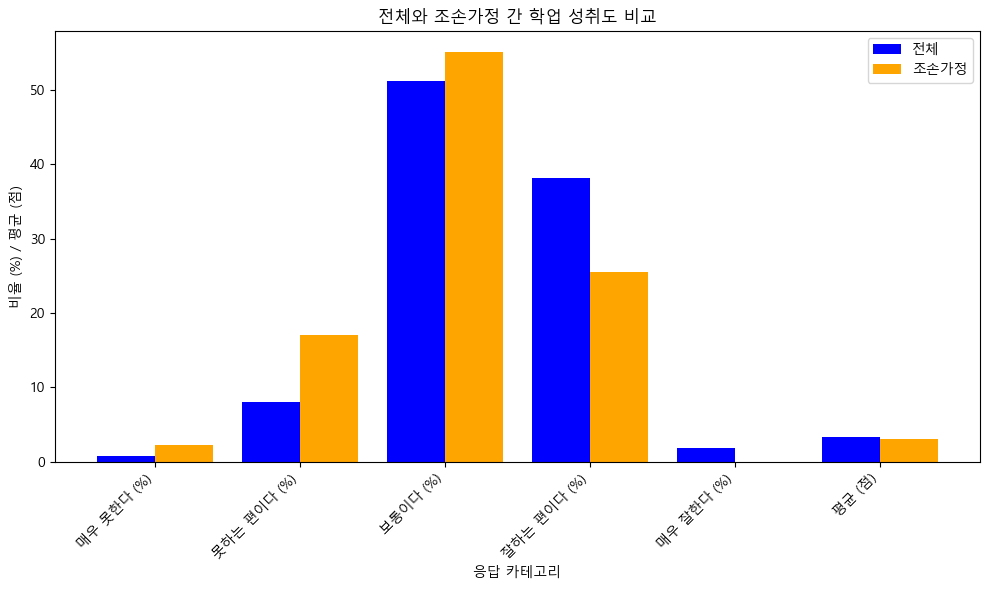

In [7]:
achievement_data = pd.read_csv('./학업_성취도.csv', encoding='cp949')

# 그래프 생성
categories = ["매우 못한다 (%)", "못하는 편이다 (%)", "보통이다 (%)", "잘하는 편이다 (%)", "매우 잘한다 (%)", "평균 (점)"]

# 데이터 추출
overall_category = achievement_data.loc[achievement_data['특성별(2)'].str.contains('소계'), categories].iloc[0]
joson_category = achievement_data.loc[achievement_data['특성별(2)'].str.contains('한부모 및 조손가족 등'), categories].iloc[0]

# 그래프 그리기
x_labels = categories
x = range(len(x_labels))
plt.figure(figsize=(10, 6))
bar_width = 0.4  # 막대 너비

plt.bar([i - bar_width / 2 for i in x], overall_category, bar_width, label='전체', color='blue')
plt.bar([i + bar_width / 2 for i in x], joson_category, bar_width, label='조손가정', color='orange')

plt.xticks(x, x_labels, rotation=45, ha='right', fontsize=10)
plt.xlabel('응답 카테고리')
plt.ylabel('비율 (%) / 평균 (점)')
plt.title("전체와 조손가정 간 학업 성취도 비교")
plt.legend()
plt.tight_layout()
plt.show()


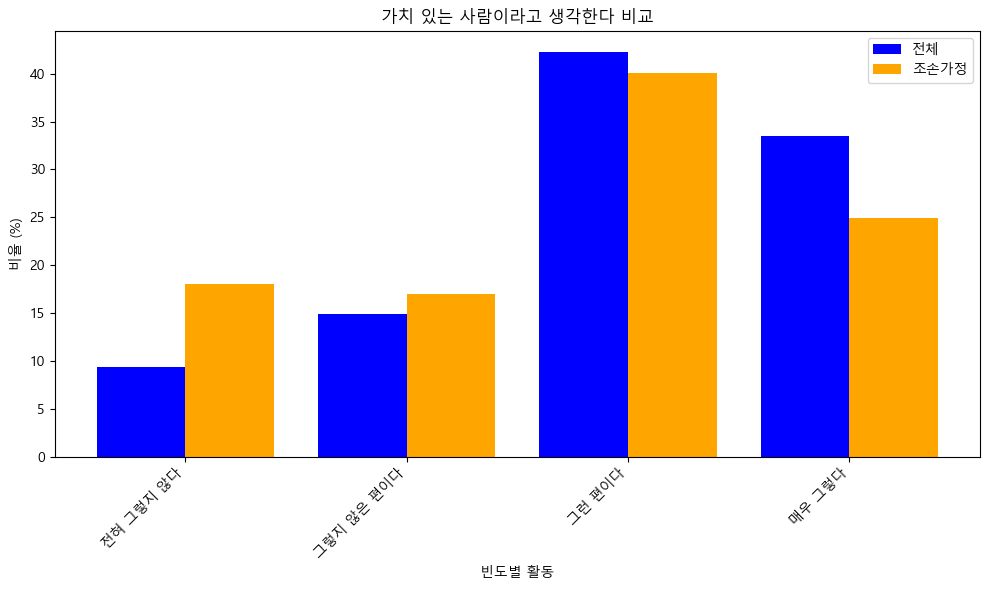

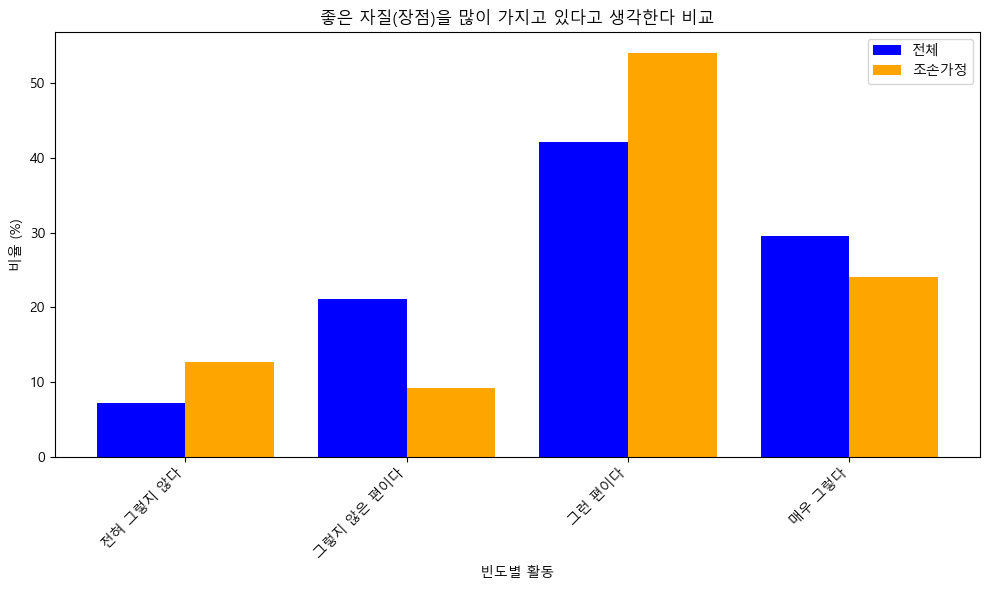

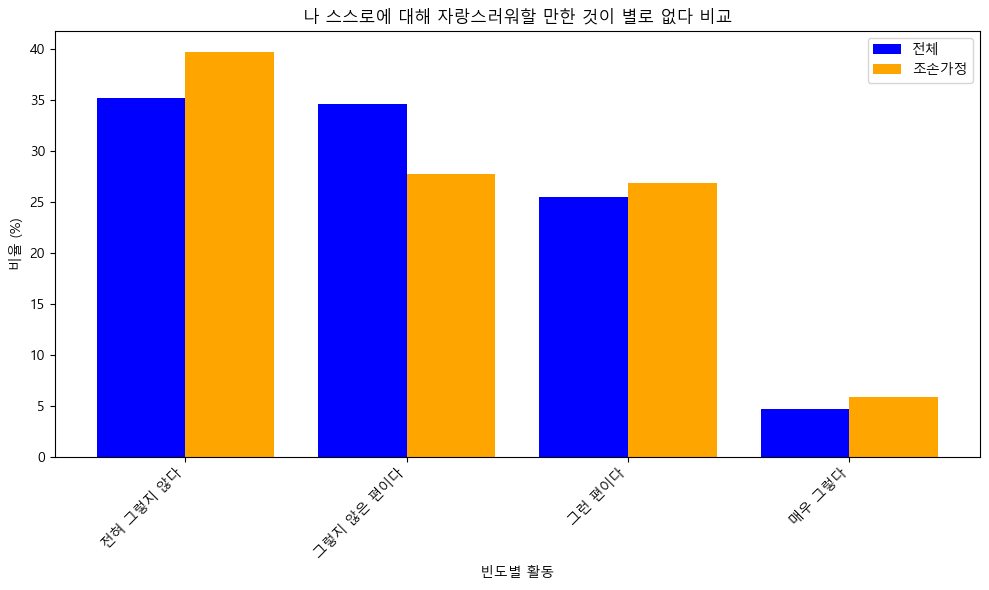

In [8]:
# 데이터 로드
file_path = './우울감__자아존중감.csv'
data = pd.read_csv(file_path, encoding='cp949')
import pandas as pd
import matplotlib.pyplot as plt

# "전체"와 "조손가정" 데이터 추출
overall_data = data[data['응답자유형별(2)'].str.contains('소계', na=False)]
joson_data = data[data['응답자유형별(2)'].str.contains('조손가정', na=False)]

# 특성 그룹 생성 (6개로 분류)
categories_groups = {
    "가치 있는 사람이라고 생각한다": [
        "전혀 그렇지 않다",
        "그렇지 않은 편이다",
        "그런 편이다",
        "매우 그렇다"
    ],
    "좋은 자질(장점)을 많이 가지고 있다고 생각한다": [
        "전혀 그렇지 않다",
        "그렇지 않은 편이다",
        "그런 편이다",
        "매우 그렇다"
    ],
    "나 스스로에 대해 자랑스러워할 만한 것이 별로 없다": [
        "전혀 그렇지 않다",
        "그렇지 않은 편이다",
        "그런 편이다",
        "매우 그렇다"
    ]
}

# 각 특성별로 그래프 생성
for group, x_labels_fixed in categories_groups.items():
    # 해당 그룹에 포함된 열만 추출
    group_columns = [col for col in data.columns if group in col]
    
    # 수치 데이터만 추출
    overall_numeric = overall_data[group_columns].apply(pd.to_numeric, errors='coerce').mean()
    joson_numeric = joson_data[group_columns].apply(pd.to_numeric, errors='coerce').mean()
    
    # 그래프 그리기
    x = range(len(x_labels_fixed))
    plt.figure(figsize=(10, 6))
    bar_width = 0.4  # 막대 너비
    plt.bar([i - bar_width / 2 for i in x], overall_numeric, bar_width, label='전체', color='blue')
    plt.bar([i + bar_width / 2 for i in x], joson_numeric, bar_width, label='조손가정', color='orange')
    
    plt.xticks(x, x_labels_fixed, rotation=45, ha='right', fontsize=10)
    plt.xlabel('빈도별 활동')
    plt.ylabel('비율 (%)')
    plt.title(f'{group} 비교')
    plt.legend()
    plt.tight_layout()
    plt.show()
